# Explore Tips

Create either a python script or a jupyter notebook named explore_tips that explores the tips data set that is built in to seaborn. Perform at least 1 t-test and 1 chi square test.

In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Exploring
import scipy.stats as stats

# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import learning_curve
%matplotlib inline

import seaborn as sns

tips = sns.load_dataset('tips')

In [2]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
tips["tip_rate"] = tips.tip / tips.total_bill

* $H_0$: There is no significant difference in the amount of tip between smokers and non-smokers
* $H_a$: There is a significant difference in the amount of tip between smokers and non-smokers

In [4]:
tips[tips.smoker == "Yes"].tip_rate

56     0.078927
58     0.156584
60     0.158206
61     0.144823
62     0.179673
         ...   
234    0.193175
236    0.079365
237    0.035638
240    0.073584
241    0.088222
Name: tip_rate, Length: 93, dtype: float64

In [5]:
# Do smokers tip more?
subgroup_1 = tips[tips.smoker == "Yes"].tip_rate
subgroup_2 = tips[tips.smoker == "No"].tip_rate

stats, p = stats.ttest_ind(subgroup_1, subgroup_2)
p

0.6318957776878522

Because p is higher than 0.05, we fail to reject the null hypothesis. Smokers don't tip significantly differently from non-smokers

In [9]:
ctab.info()

<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 2 entries, Male to Female
Data columns (total 2 columns):
Yes    2 non-null int64
No     2 non-null int64
dtypes: int64(2)
memory usage: 130.0 bytes


In [15]:
# Are women more likely to be smokers?

observed = pd.crosstab(tips.smoker, tips.day)
chi2_stat, p, degf, expected = stats.chi2_contingency(observed)

AttributeError: 'numpy.float64' object has no attribute 'chi2_contingency'

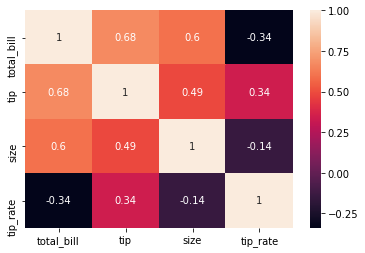

In [14]:
sns.heatmap(tips.corr(), annot=True)